In [5]:
import numpy as np

In [6]:
n = 1000;
dif_mat = np.zeros((n-1,n))
for i in range(n-1):
  for j in range(n):
    if (i ==j):
      dif_mat[i,j] = 1
    elif (j == i-1):
      dif_mat[i,j] = -1
print(dif_mat)


[[ 1.  0.  0. ...  0.  0.  0.]
 [-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... -1.  1.  0.]]


In [7]:
dif_mat.shape

(999, 1000)

Ques 1: Apply D to obtain an approximation of the derivative of f (x) = sin(x), plot the result, and verify that you get what you expect.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

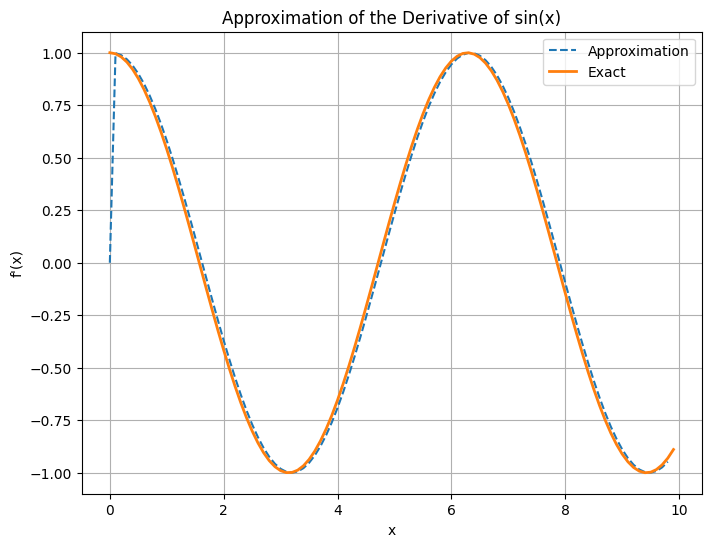

In [9]:
# Parameters
n = 100  # Number of points
h = 0.1  # Grid spacing

# Create the grid
x = np.arange(0, n * h, h)

# Create the differentiation matrix D
D = np.diag(-np.ones(n - 1), k=-1) + np.diag(np.ones(n))

# Compute the approximation of the derivative of sin(x)
f = np.sin(x)
df_approx = (1 / h) * np.dot(D[:-1], f)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x[:-1], df_approx, label='Approximation', linestyle='--')
plt.plot(x, np.cos(x), label='Exact', linewidth=2)
plt.title('Approximation of the Derivative of sin(x)')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()


Ques 2: Apply D to obtain an approximation of the derivative of f (x) = x2 + 2 sin(10x) for a thousand or more equally spaced values of x. Plot the result. Experiment with what happens if you add the averaging operator from the previous exercise into the mix.

In [17]:
x = np.linspace(0, 2*3.14,1000)
y = x**2 + 2*(np.sin(10*x))
y1 = np.matmul(dif_mat,y)
y1 = y1/(2*3.14/1000)

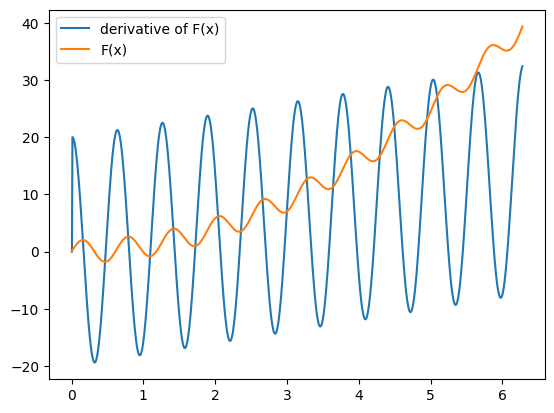

In [18]:
import matplotlib.pyplot as plt
plt.plot(x[1:],y1,label ='derivative of F(x)')
plt.plot(x,y,label = 'F(x)')
plt.legend(loc='best')

Efficient Approach

In [19]:
from numpy import diag

In [20]:
def get_diff_mat(n):
  diff1 = np.diag(np.ones((n-2)),-1)
  diff2 = np.diag(np.ones((n-1)))
  diff_mat_eff = diff2 - diff1
  return diff_mat_eff

In [21]:
diff_mat_eff = get_diff_mat(n)

In [22]:
x_new = x[:-1]
y_new = x_new**2 + 2*(np.sin(10*x_new))
y_new.shape


(999,)

In [23]:
y_new = x_new**2 + 2*(np.sin(10*x_new))
y1_new = np.matmul(diff_mat_eff,y_new)
y1_new = y1_new/(2*3.14/1000)

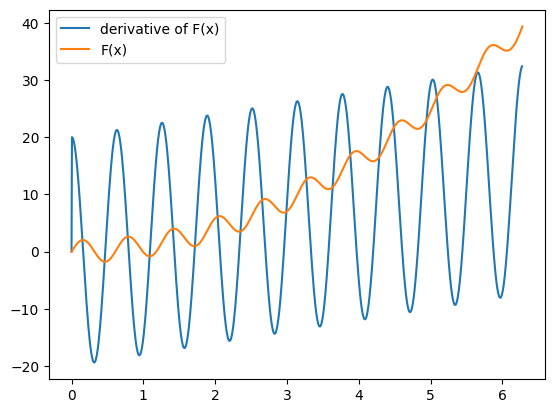

In [24]:
import matplotlib.pyplot as plt
plt.plot(x_new,y1_new,label ='derivative of F(x)')
plt.plot(x,y,label = 'F(x)')
plt.legend(loc='best')

In [25]:
def get_diag_mat(n,k):
  y = np.diag(np.ones(n))
  for i in range(1,k):
    y = y+ np.diag(np.ones(n-i),i) +np.diag(np.ones(n-i),-i)
  return y

In [26]:
def get_avg_mat(y):
  avg = np.sum(y,1)
  for i in range(len(avg)):
    y[i,:] = y[i,:]/avg[i]
  return y

In [27]:
def plot_fornk(n,k,y,diff_mat_eff):
  A = get_diag_mat(n,k)
  A = get_avg_mat(A)
  y_1 = np.matmul(A,y)
  plt.plot(x,y_1,label="Applying averaging matrix to F(x)")
  y_1 = np.matmul(diff_mat_eff,y_1[:-1])
  y_1 = y_1/(2*3.14/1000)
  plt.plot(x_new,y_1,label ='Derivative after applying averaging matrix to F(x)')
  plt.plot(x,y,label = 'F(x)')

  plt.legend(loc='best')

In [28]:
A = get_diag_mat(n,100)
A = get_avg_mat(A)

In [29]:
y_1 = np.matmul(A,y)
y_1 = np.matmul(diff_mat_eff,y_1[:-1])
y_1 = y_1/(2*3.14/1000)

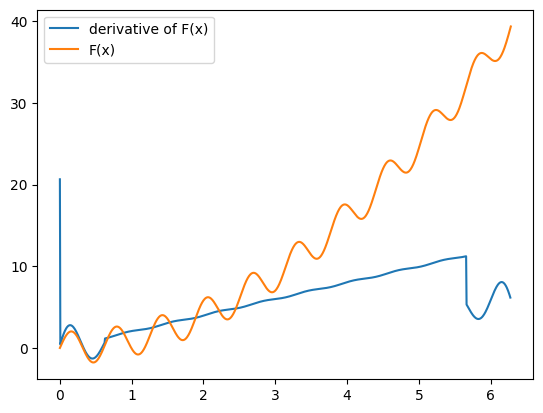

In [30]:
plt.plot(x_new,y_1,label ='derivative of F(x)')
plt.plot(x,y,label = 'F(x)')
plt.legend(loc='best')


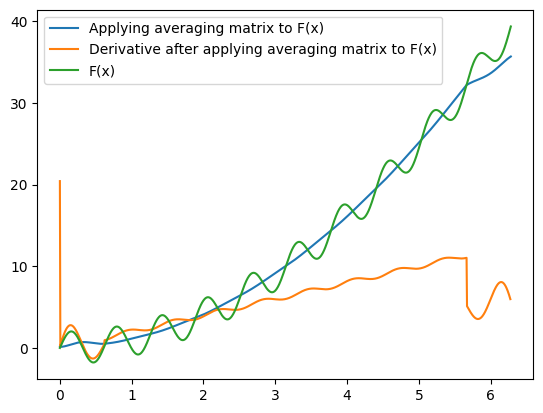

In [31]:
plot_fornk(n,99,y,diff_mat_eff)

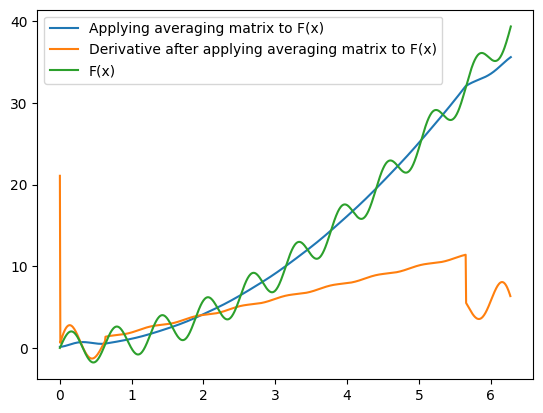

In [32]:
plot_fornk(n,101,y,diff_mat_eff)

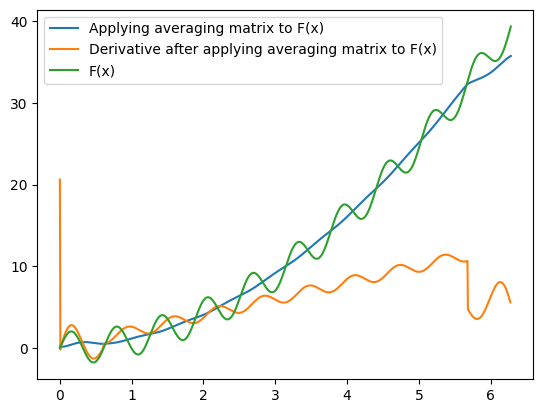

In [33]:
plot_fornk(n,97,y,diff_mat_eff)

In [34]:
def add_avg_mat(n,k,y,diff_mat_eff):
  A = get_diag_mat(n,k)
  A = get_avg_mat(A)
  y_1 = np.matmul(A,y)

  y_2 = np.matmul(diff_mat_eff,y[:-1])
  y_2 = y_2/(2*3.14/1000)
  y_1 = y_1[:-1]+y_2
  plt.plot(x_new,y_2,label ='Derivative of F(x)')
  plt.plot(x,y,label = 'F(x)')
  plt.plot(x_new,y_1,label="Adding averaging matrix to derivative")
  plt.legend(loc='best')

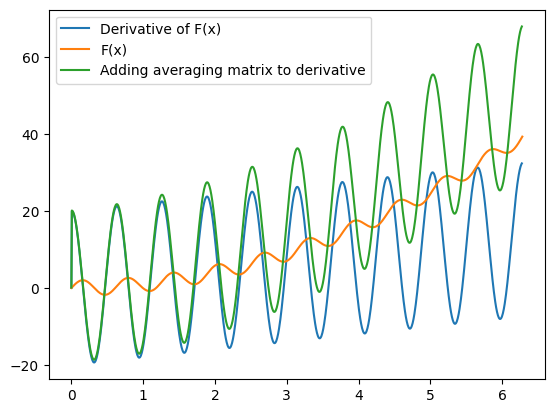

In [35]:
add_avg_mat(n,100,y,diff_mat_eff)

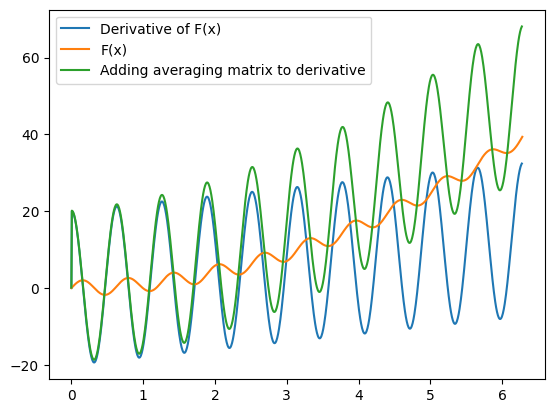

In [36]:
add_avg_mat(n,98,y,diff_mat_eff)

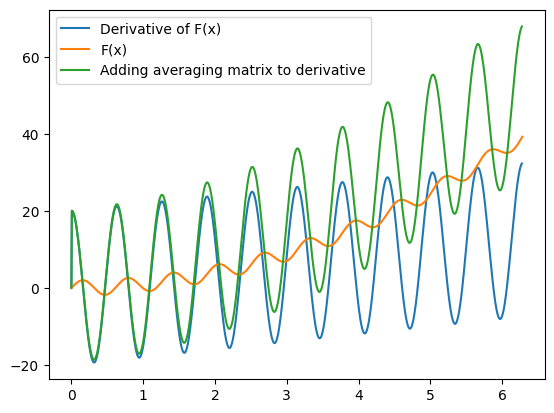

In [37]:
add_avg_mat(n,99,y,diff_mat_eff)
